In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score

import tensorflow as tf

In [2]:
X_train = pd.read_csv("/Users/haoxuhuang/Desktop/CSCI5461/csci5461spring2020/X_train.csv", index_col=0)
X_train.head()
X_train.shape

(6154, 625)

In [3]:
X_train.head()

,ACH.000681,ACH.000889,ACH.000085,ACH.000045,ACH.000272,ACH.000422,ACH.000965,ACH.000182,ACH.000771,ACH.001197,...,ACH.000260,ACH.001190,ACH.000041,ACH.001654,ACH.000450,ACH.000070,ACH.000142,ACH.000047,ACH.001048,ACH.000577
id,,,,,,,,,,,,,,,,,,,,,
ADAM12,0.059848,-0.053661,-0.091688,-0.068956,-0.152298,-0.088696,-0.128184,-0.285314,0.032311,-0.425669,...,-0.087220,-0.273373,-0.182057,-0.150483,-0.230742,-0.264071,-0.086457,0.000345,0.070497,-0.218662
ASCL2,0.093353,0.276959,-0.185533,0.125729,0.175377,0.017200,0.035373,0.071974,0.032111,0.092091,...,-0.044362,0.147615,0.260828,0.046438,0.088017,0.059690,0.104963,0.065113,0.174177,-0.105719
CLDN9,-0.038010,0.015903,-0.014372,-0.217112,-0.146029,-0.193692,-0.242332,-0.235526,0.041940,-0.429223,...,-0.133552,-0.178062,0.018662,-0.060168,0.032538,-0.161255,-0.301312,-0.171753,0.055067,-0.332369
RASL10A,-0.185151,-0.236928,-0.352355,-0.206573,-0.306400,-0.228536,-0.257675,-0.156477,-0.346809,-0.243910,...,-0.198335,0.055731,-0.213767,-0.297809,-0.512565,-0.168426,-0.359277,-0.273639,-0.268021,0.061375
CD5,-0.294807,-0.192580,-0.229294,-0.329013,-0.226258,-0.380718,-0.189461,-0.351066,-0.287450,-0.109523,...,-0.284807,-0.486690,-0.113514,-0.265717,-0.324331,-0.346739,-0.357096,-0.209632,-0.323761,-0.399769


In [4]:
y_train = pd.read_csv("/Users/haoxuhuang/Desktop/CSCI5461/csci5461spring2020/y_train.csv", index_col=0)
y_train.head()
y_train.shape

(6154, 200)

In [5]:
y_train.head()

,GO:0007204,GO:0031146,GO:0019216,GO:0033209,GO:0009617,GO:0042391,GO:0032869,GO:0098609,GO:0000902,GO:0034765,...,GO:0030182,GO:0006338,GO:0097711,GO:0007218,GO:0006406,GO:1902476,GO:0006464,GO:0035335,GO:0030593,GO:0016055
id,,,,,,,,,,,,,,,,,,,,,
ADAM12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASCL2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
CLDN9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RASL10A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CD5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# quantile normalization
rank_mean = X_train.stack().groupby(X_train.rank(method='first').stack().astype(int)).mean()
rank_mean

1      -2.438735
2      -2.304550
3      -2.243859
4      -2.200964
5      -2.166120
          ...   
6150    0.610317
6151    0.647893
6152    0.702511
6153    0.804925
6154    1.087970
Length: 6154, dtype: float64

In [7]:
X_train_qt = X_train.rank(method='min').stack().astype(int).map(rank_mean).unstack()
X_train_qt.head()

,ACH.000681,ACH.000889,ACH.000085,ACH.000045,ACH.000272,ACH.000422,ACH.000965,ACH.000182,ACH.000771,ACH.001197,...,ACH.000260,ACH.001190,ACH.000041,ACH.001654,ACH.000450,ACH.000070,ACH.000142,ACH.000047,ACH.001048,ACH.000577
id,,,,,,,,,,,,,,,,,,,,,
ADAM12,0.049470,-0.061936,-0.081134,-0.083111,-0.162334,-0.097121,-0.141125,-0.330553,0.030718,-0.375188,...,-0.093551,-0.233282,-0.177358,-0.165659,-0.214362,-0.262129,-0.069274,-0.005070,0.083957,-0.169024
ASCL2,0.080002,0.319534,-0.161737,0.120212,0.196878,0.017875,0.049284,0.075813,0.030633,0.099817,...,-0.042781,0.160946,0.255472,0.066987,0.060236,0.044964,0.110916,0.067383,0.196324,-0.079529
CLDN9,-0.051569,0.016103,-0.011770,-0.236261,-0.155064,-0.201608,-0.258831,-0.271264,0.042067,-0.376674,...,-0.150467,-0.149178,0.021935,-0.058187,0.013508,-0.165409,-0.279909,-0.194765,0.069624,-0.263711
RASL10A,-0.205148,-0.253268,-0.324452,-0.223365,-0.321478,-0.241303,-0.278393,-0.182117,-0.361728,-0.213585,...,-0.224337,0.069238,-0.210847,-0.325018,-0.485039,-0.171942,-0.337714,-0.301928,-0.291186,0.046798
CD5,-0.316651,-0.207529,-0.204545,-0.342141,-0.240257,-0.392360,-0.204545,-0.397942,-0.306318,-0.092962,...,-0.317986,-0.457130,-0.109173,-0.296243,-0.297633,-0.336548,-0.334561,-0.235778,-0.353900,-0.322826


/Users/haoxuhuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105d9ea90>,
      dtype=object)

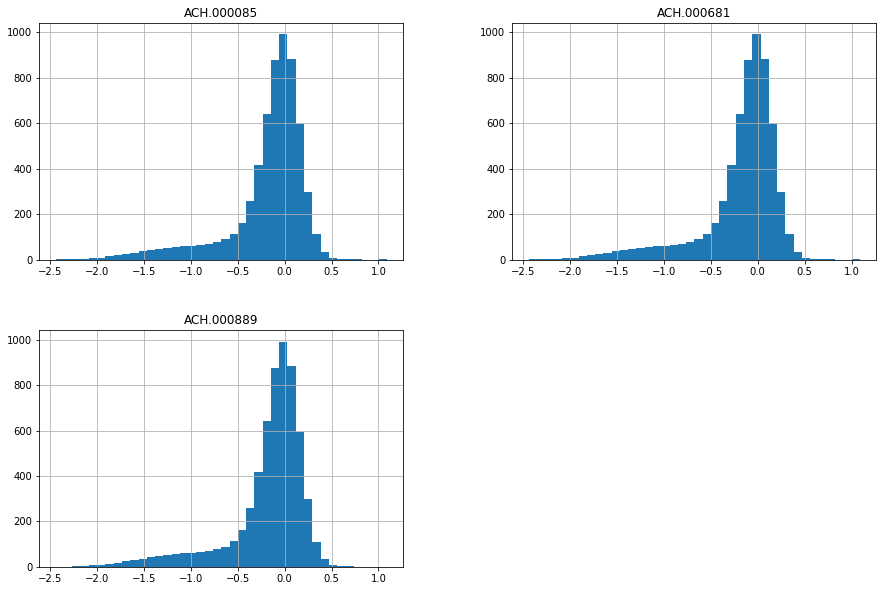

In [8]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
X_train_qt.hist(ax=ax,column=["ACH.000681", "ACH.000889", "ACH.000085"],bins=40)

In [9]:
x_train, x_test, y_train2, y_test = train_test_split(X_train_qt, y_train, test_size = 0.2)

In [65]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion="gini", 
                                bootstrap=True, max_features=25,
                                verbose=3, n_jobs=-1, max_depth=15)

rf_clf.fit(x_train, y_train2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   32.2s


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=3,
                       warm_start=False)

In [81]:
y_test.shape

(1231, 200)

In [74]:
rf_preds = rf_clf.predict_proba(x_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


In [90]:
np.array(rf_preds).shape

(200, 1231, 2)

In [91]:
np.array(rf_preds)[:,:,1]

array([[0.01802197, 0.01770794, 0.01815534, ..., 0.01815534, 0.01815534,
        0.01815534],
       [0.00641129, 0.0060552 , 0.00647078, ..., 0.00647078, 0.00647078,
        0.00647078],
       [0.00989539, 0.01040883, 0.00996579, ..., 0.00996579, 0.00996579,
        0.00996579],
       ...,
       [0.01101535, 0.01154457, 0.01108327, ..., 0.01108327, 0.01108327,
        0.01108327],
       [0.00958599, 0.00930407, 0.00950319, ..., 0.00950319, 0.00950319,
        0.00950319],
       [0.01569189, 0.01526736, 0.01583319, ..., 0.01583319, 0.01583319,
        0.01583319]])

In [92]:
rf_auc_score = roc_auc_score(y_test.to_numpy(), np.array(rf_preds)[:,:,1].T, average='micro')
rf_auc_score

0.643417681927946

In [12]:
# Random Forest Feature importances
imp_indices=[]
importances=rf_clf.feature_importances_
std=np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices=np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))
    imp_indices.append(indices[f])

Feature ranking:
1. feature 252 (0.008226)
2. feature 218 (0.008208)
3. feature 276 (0.006297)
4. feature 171 (0.005588)
5. feature 292 (0.005413)
6. feature 278 (0.004746)
7. feature 458 (0.004485)
8. feature 429 (0.004469)
9. feature 148 (0.004196)
10. feature 436 (0.004158)
11. feature 373 (0.004100)
12. feature 415 (0.004041)
13. feature 605 (0.003872)
14. feature 257 (0.003798)
15. feature 422 (0.003763)
16. feature 283 (0.003762)
17. feature 423 (0.003730)
18. feature 13 (0.003710)
19. feature 584 (0.003605)
20. feature 258 (0.003600)
21. feature 204 (0.003590)
22. feature 563 (0.003476)
23. feature 416 (0.003311)
24. feature 624 (0.003295)
25. feature 196 (0.003286)
26. feature 380 (0.003280)
27. feature 449 (0.003264)
28. feature 393 (0.003235)
29. feature 592 (0.003234)
30. feature 343 (0.003208)
31. feature 428 (0.003178)
32. feature 62 (0.003147)
33. feature 581 (0.003084)
34. feature 495 (0.003070)
35. feature 455 (0.003070)
36. feature 437 (0.003040)
37. feature 452 (0.002

In [14]:
X_train.columns[216]

'ACH.000092'

In [21]:
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances

ACH.000681    0.001115
ACH.000889    0.001577
ACH.000085    0.001588
ACH.000045    0.001188
ACH.000272    0.001858
                ...   
ACH.000070    0.001834
ACH.000142    0.001020
ACH.000047    0.001281
ACH.001048    0.001749
ACH.000577    0.003295
Length: 625, dtype: float64

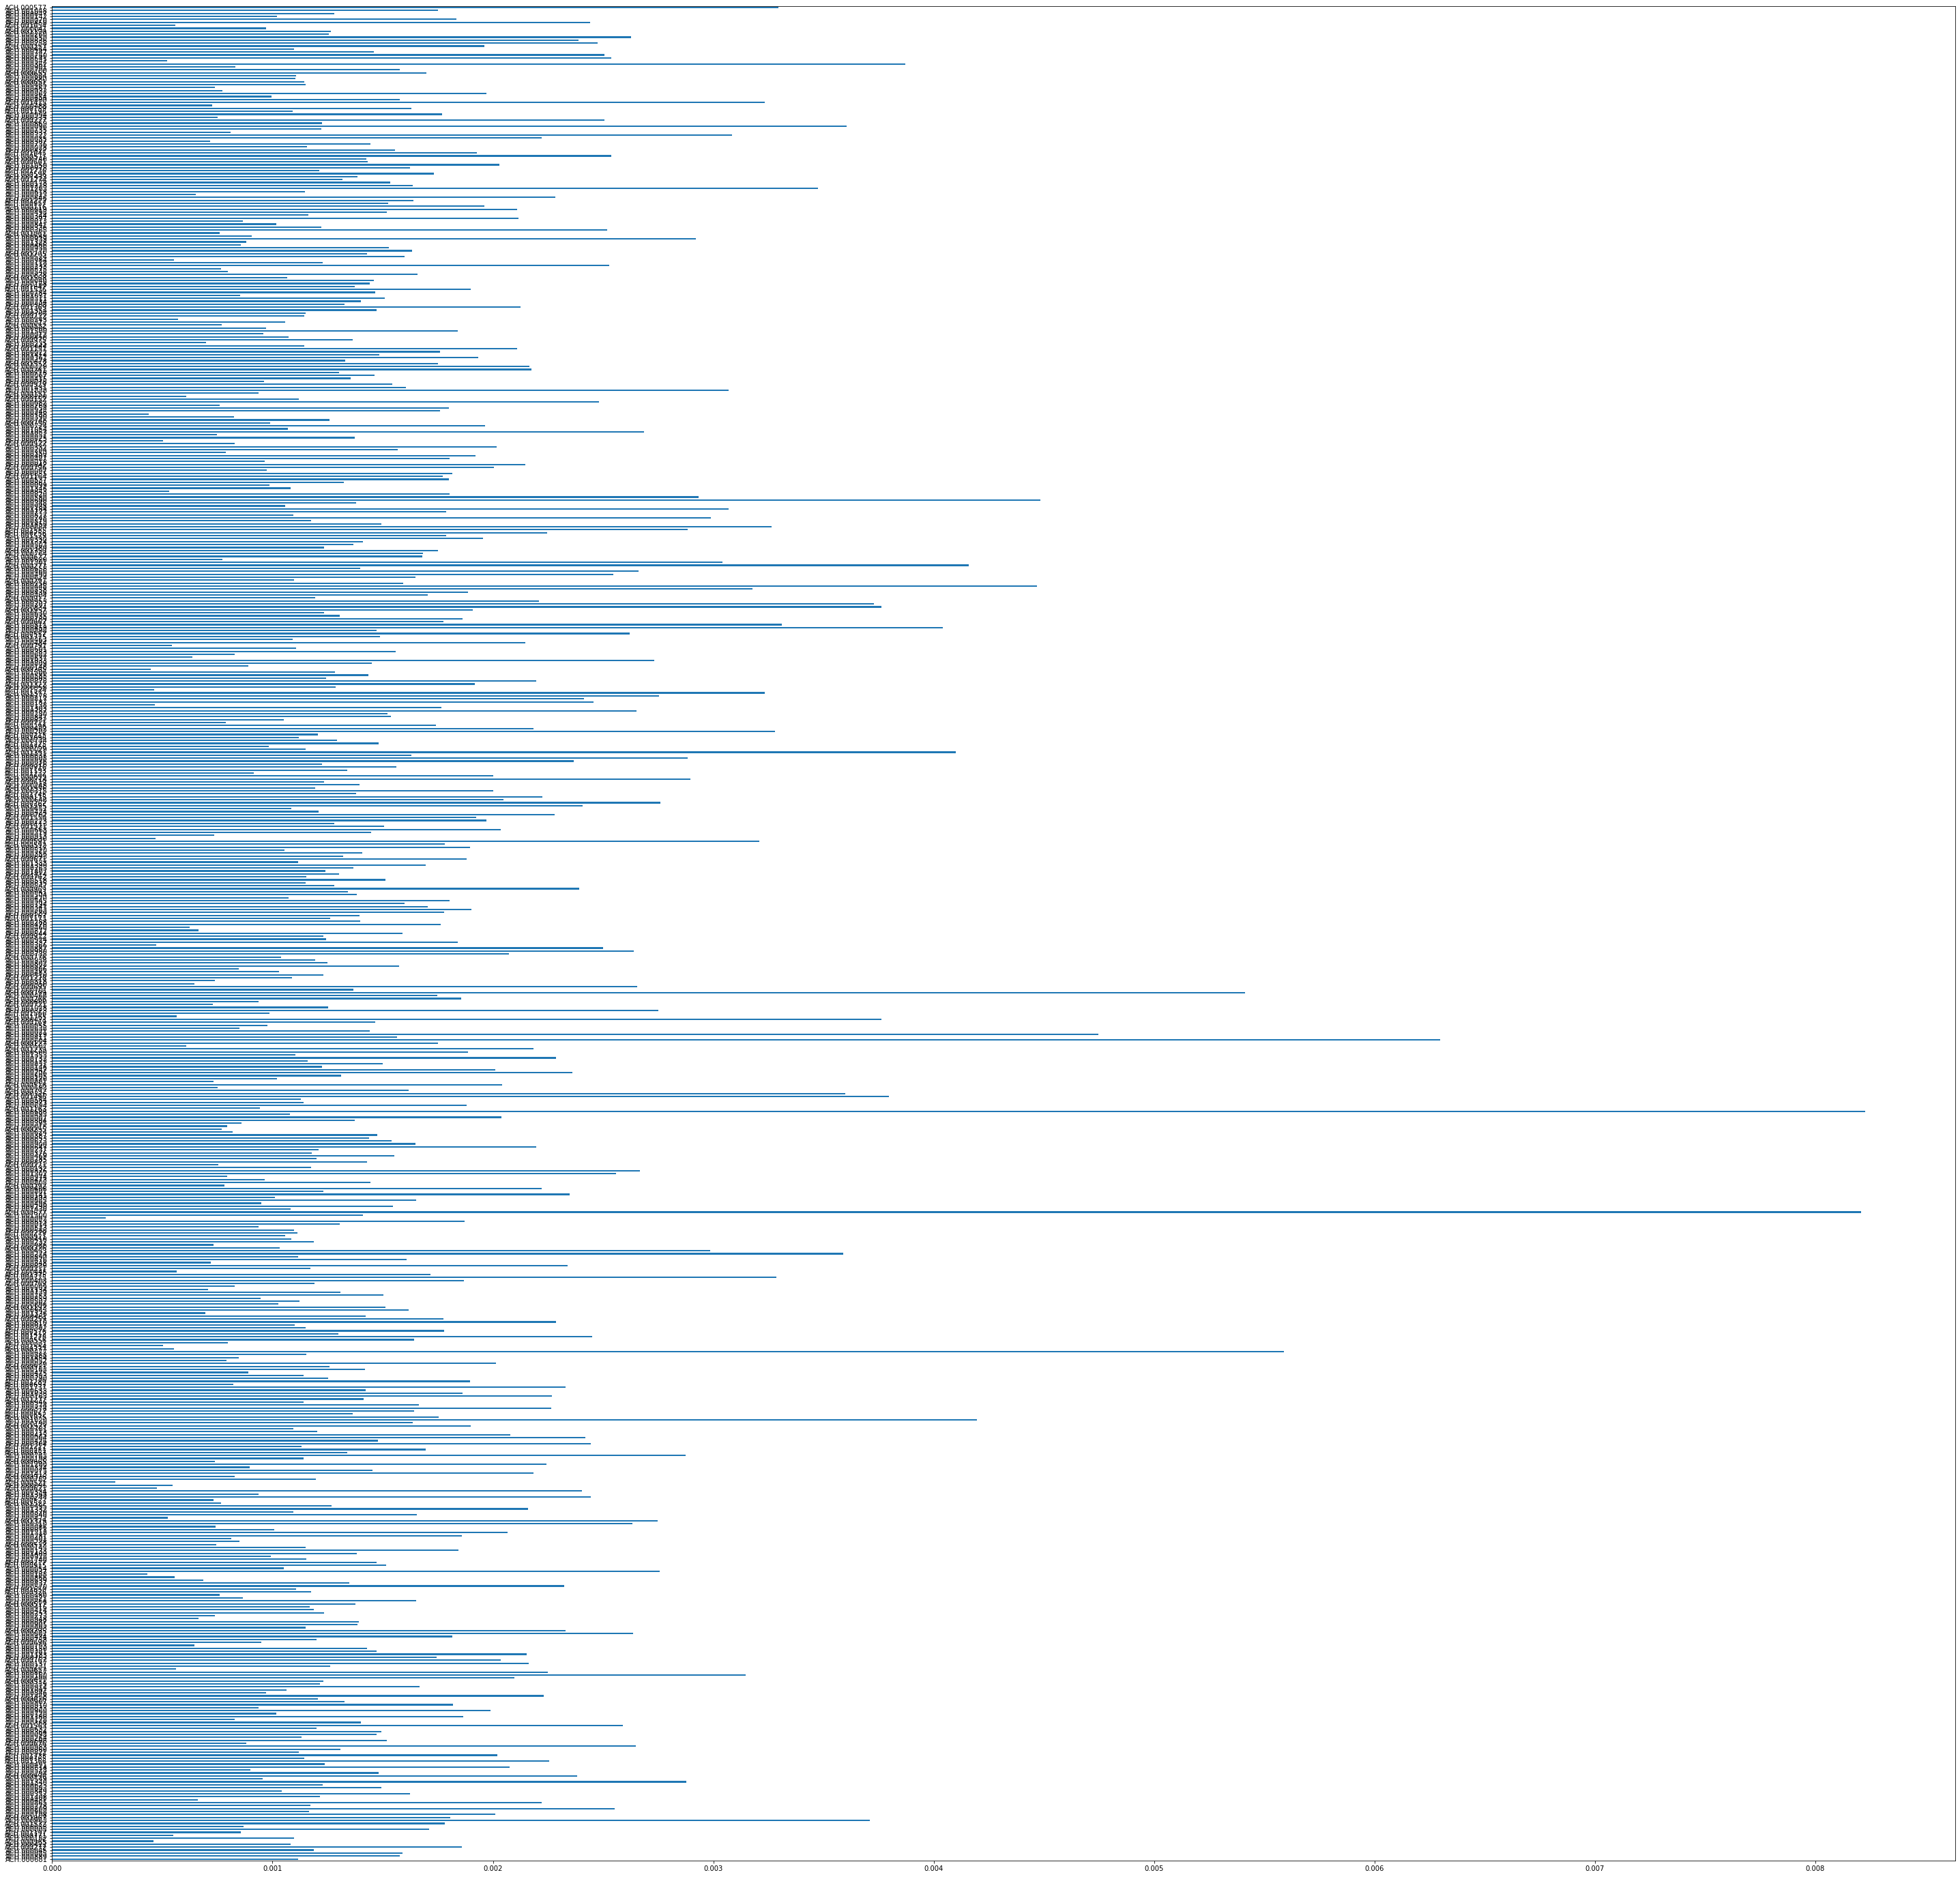

In [25]:
plt.figure(figsize=(50,50))
feat_importances.plot(kind='barh')

In [109]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion="gini", 
                                bootstrap=True, verbose=3, n_jobs=-1, 
                                max_depth=15)

In [110]:
scores = cross_val_score(rf_clf, X_train_qt, y_train, cv = 5, scoring='roc_auc')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]:

In [111]:
scores

array([0.58075807, 0.57636218, 0.58839441, 0.58512166, 0.60459924])

In [114]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, X, y, cv=3)
y_pred

array([174.26933996, 117.6539241 , 164.60228641, 155.65049088,
       132.68647979, 128.49511245, 120.76146877, 141.069413  ,
       164.18904498, 182.37394949, 111.04181265, 127.94311443,
       135.0869234 , 162.83066014, 135.3573514 , 157.64516523,
       178.95843326, 163.3919841 , 143.85237903, 144.29748882,
       133.58117218, 124.77928571, 132.90918003, 208.52927   ,
       153.61908967, 154.16616341, 118.95351821, 163.50467541,
       145.89406196, 168.3308101 , 155.87411031, 123.45960148,
       185.70459144, 133.38468582, 117.2789469 , 150.27895019,
       174.1541028 , 160.03235091, 192.31389633, 161.58568256,
       154.2224809 , 119.35517679, 146.15706413, 133.82056934,
       179.68118754, 137.96619936, 146.07788398, 126.77579723,
       123.32101099, 166.26710247, 146.41559964, 161.67261029,
       147.47731459, 138.44595305, 144.85421048, 113.77990664,
       185.54970402, 115.31624749, 142.23672103, 171.07792136,
       132.5394716 , 177.80524864, 116.5616502 , 134.25

In [119]:
from bayes_opt import BayesianOptimization
pbounds = {"n_estimators": (100, 500),
           "max_depth": (1, 50),
           "min_samples_split": (2, 10),
           "min_samples_leaf": (1, 10)}

In [120]:
def rf_hyper_param(n_estimators,
             max_depth,
             min_samples_split,
             min_samples_leaf):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    
    rf_clf = RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   min_samples_leaf=int(max(min_samples_leaf,1)),
                   n_jobs=-1,
                   random_state=42,
                   verbose=3)
    
    return np.mean(cross_val_score(rf_clf, X_train_qt, y_train, cv=5, scoring='roc_auc', verbose=3))

In [121]:
optimizer = BayesianOptimization(
    f=rf_hyper_param,
    pbounds=pbounds,
    verbose=2,
    random_state=1,
)

In [122]:
optimizer.maximize(
    init_points=5,
    n_iter=30,
)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  5.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 220 out of 220 | elapsed:    3.9s finished


[CV] .................................... , score=0.609, total= 5.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  5.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 220 out of 220 | elapsed:    3.7s finished


[CV] .................................... , score=0.612, total= 5.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  5.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 220 out of 220 | elapsed:    3.8s finished


[CV] .................................... , score=0.625, total= 5.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  5.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 220 out of 220 | elapsed:    3.7s finished


[CV] .................................... , score=0.629, total= 5.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  5.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 220 out of 220 | elapsed:    3.7s finished


[CV] .................................... , score=0.632, total= 5.3min
|  1        |  0.6214   |  21.43    |  7.483    |  2.001    |  220.9    |
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 26.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 238 out of 238 | elapsed:    4.1s finished


[CV] .................................... , score=0.587, total= 2.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 238 out of 238 | elapsed:    4.0s finished


[CV] .................................... , score=0.588, total= 2.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 238 out of 238 | elapsed:    4.0s finished


[CV] .................................... , score=0.597, total= 2.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 238 out of 238 | elapsed:    4.1s finished


[CV] .................................... , score=0.603, total= 2.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 238 out of 238 | elapsed:    3.9s finished


[CV] .................................... , score=0.608, total= 2.6min
|  2        |  0.5965   |  8.191    |  1.831    |  3.49     |  238.2    |
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 374 out of 374 | elapsed:  8.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 374 out of 374 | elapsed:    6.3s finished


[CV] .................................... , score=0.605, total= 8.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 374 out of 374 | elapsed:  8.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 374 out of 374 | elapsed:    6.2s finished


[CV] .................................... , score=0.611, total= 9.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 17.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 374 out of 374 | elapsed:  8.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 374 out of 374 | elapsed:    6.3s finished


[CV] .................................... , score=0.620, total= 8.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 374 out of 374 | elapsed:  8.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 374 out of 374 | elapsed:    6.3s finished


[CV] .................................... , score=0.629, total= 8.8min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 374 out of 374 | elapsed:  8.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 374 out of 374 | elapsed:    6.4s finished


[CV] .................................... , score=0.634, total= 8.8min
|  3        |  0.6198   |  20.44    |  5.849    |  5.354    |  374.1    |
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 44.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 368 out of 368 | elapsed:    6.3s finished


[CV] .................................... , score=0.612, total= 5.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 368 out of 368 | elapsed:    6.2s finished


[CV] .................................... , score=0.607, total= 5.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 368 out of 368 | elapsed:    6.1s finished


[CV] .................................... , score=0.622, total= 5.1min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 368 out of 368 | elapsed:    6.1s finished


[CV] .................................... , score=0.627, total= 5.1min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 368 out of 368 | elapsed:    6.2s finished


[CV] .................................... , score=0.627, total= 5.1min
|  4        |  0.619    |  11.02    |  8.903    |  2.219    |  368.2    |
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 25.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:  4.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 179 out of 179 | elapsed:    3.0s finished


[CV] .................................... , score=0.599, total= 4.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:  4.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 179 out of 179 | elapsed:    3.1s finished


[CV] .................................... , score=0.611, total= 4.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:  4.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 179 out of 179 | elapsed:    3.1s finished


[CV] .................................... , score=0.618, total= 4.4min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:  4.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 179 out of 179 | elapsed:    3.0s finished


[CV] .................................... , score=0.635, total= 4.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:  4.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 179 out of 179 | elapsed:    3.0s finished


[CV] .................................... , score=0.631, total= 4.3min
|  5        |  0.6187   |  21.45    |  6.028    |  3.123    |  179.2    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 21.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 21.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    9.1s finished


[CV] .................................... , score=0.617, total=21.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 21.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    8.7s finished


[CV] .................................... , score=0.614, total=22.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 44.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 21.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    9.0s finished


[CV] .................................... , score=0.626, total=21.8min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 22.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    8.5s finished


[CV] .................................... , score=0.641, total=22.2min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 21.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    8.6s finished


[CV] .................................... , score=0.641, total=21.8min
|  6        |  0.6276   |  49.79    |  9.189    |  4.518    |  496.4    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 109.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:  4.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 102 out of 102 | elapsed:    1.8s finished


[CV] .................................... , score=0.609, total= 4.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:  4.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 102 out of 102 | elapsed:    1.8s finished


[CV] .................................... , score=0.605, total= 4.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:  4.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 102 out of 102 | elapsed:    1.8s finished


[CV] .................................... , score=0.620, total= 4.7min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:  4.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 102 out of 102 | elapsed:    1.8s finished


[CV] .................................... , score=0.621, total= 4.8min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:  4.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 102 out of 102 | elapsed:    1.8s finished


[CV] .................................... , score=0.625, total= 4.7min
|  7        |  0.616    |  48.91    |  7.66     |  2.941    |  102.4    |
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 23.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 20.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    8.7s finished


[CV] .................................... , score=0.616, total=20.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 20.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 18.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    8.7s finished


[CV] .................................... , score=0.614, total=18.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 39.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 17.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    8.6s finished


[CV] .................................... , score=0.628, total=17.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 18.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    8.6s finished


[CV] .................................... , score=0.647, total=18.2min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 17.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    8.7s finished


[CV] .................................... , score=0.642, total=18.0min
|  8        |  0.6291   |  49.45    |  8.937    |  2.184    |  499.9    |
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 93.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 19.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    8.5s finished


[CV] .................................... , score=0.616, total=19.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 19.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 19.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    9.5s finished


[CV] .................................... , score=0.615, total=19.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 39.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 32.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    8.7s finished


[CV] .................................... , score=0.627, total=32.5min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 20.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    8.6s finished


[CV] .................................... , score=0.632, total=20.7min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed: 31.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 496 out of 496 | elapsed:    8.3s finished


[CV] .................................... , score=0.635, total=32.0min
|  9        |  0.6251   |  48.11    |  5.404    |  4.82     |  496.9    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 124.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:   59.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 498 out of 498 | elapsed:    8.4s finished


[CV] .................................... , score=0.572, total= 1.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:   59.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 498 out of 498 | elapsed:    8.3s finished


[CV] .................................... , score=0.583, total= 1.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:   57.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 498 out of 498 | elapsed:    8.5s finished


[CV] .................................... , score=0.575, total= 1.1min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:   48.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 498 out of 498 | elapsed:    8.6s finished


[CV] .................................... , score=0.586, total=  57.8s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:   48.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 498 out of 498 | elapsed:    8.9s finished


[CV] .................................... , score=0.584, total=  57.5s
|  10       |  0.5802   |  1.096    |  7.053    |  9.662    |  498.1    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 331 out of 331 | elapsed: 11.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 331 out of 331 | elapsed:    5.7s finished


[CV] .................................... , score=0.615, total=11.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 331 out of 331 | elapsed: 11.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 331 out of 331 | elapsed:    5.8s finished


[CV] .................................... , score=0.611, total=11.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 23.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 331 out of 331 | elapsed: 11.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 331 out of 331 | elapsed:    5.8s finished


[CV] .................................... , score=0.626, total=11.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 331 out of 331 | elapsed: 11.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 331 out of 331 | elapsed:    5.8s finished


[CV] .................................... , score=0.640, total=11.7min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 331 out of 331 | elapsed: 11.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 331 out of 331 | elapsed:    6.3s finished


[CV] .................................... , score=0.638, total=11.6min
|  11       |  0.6261   |  49.71    |  9.508    |  2.914    |  331.2    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 58.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:  7.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 181 out of 181 | elapsed:    3.1s finished


[CV] .................................... , score=0.607, total= 7.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:  7.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 181 out of 181 | elapsed:    3.2s finished


[CV] .................................... , score=0.606, total= 7.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 15.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:  7.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 181 out of 181 | elapsed:    3.2s finished


[CV] .................................... , score=0.610, total= 7.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:  7.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 181 out of 181 | elapsed:    3.2s finished


[CV] .................................... , score=0.614, total= 7.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:  7.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 181 out of 181 | elapsed:    3.2s finished


[CV] .................................... , score=0.622, total= 7.9min
|  12       |  0.6121   |  49.48    |  2.051    |  2.331    |  181.7    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 39.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 435 out of 435 | elapsed: 29.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 435 out of 435 | elapsed:    7.8s finished


[CV] .................................... , score=0.615, total=29.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 29.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 435 out of 435 | elapsed: 15.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 435 out of 435 | elapsed:    7.5s finished


[CV] .................................... , score=0.614, total=15.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 44.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 435 out of 435 | elapsed: 14.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 435 out of 435 | elapsed:    7.6s finished


[CV] .................................... , score=0.629, total=15.0min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 435 out of 435 | elapsed: 15.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 435 out of 435 | elapsed:    7.6s finished


[CV] .................................... , score=0.639, total=15.2min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 435 out of 435 | elapsed: 14.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 435 out of 435 | elapsed:    7.8s finished


[CV] .................................... , score=0.642, total=15.0min
|  13       |  0.6276   |  48.04    |  9.987    |  3.59     |  435.8    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 90.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  4.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 147 out of 147 | elapsed:    2.5s finished


[CV] .................................... , score=0.612, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  4.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 147 out of 147 | elapsed:    2.5s finished


[CV] .................................... , score=0.602, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  4.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 147 out of 147 | elapsed:    2.6s finished


[CV] .................................... , score=0.625, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  4.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 147 out of 147 | elapsed:    2.5s finished


[CV] .................................... , score=0.634, total= 4.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  4.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 147 out of 147 | elapsed:    2.6s finished


[CV] .................................... , score=0.635, total= 4.8min
|  14       |  0.6218   |  45.76    |  9.941    |  9.746    |  147.5    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 24.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:   43.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 101 out of 101 | elapsed:    1.7s finished


[CV] .................................... , score=0.604, total=  46.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:   44.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 101 out of 101 | elapsed:    1.7s finished


[CV] .................................... , score=0.598, total=  46.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:   44.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 101 out of 101 | elapsed:    1.7s finished


[CV] .................................... , score=0.611, total=  46.4s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:   44.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 101 out of 101 | elapsed:    1.7s finished


[CV] .................................... , score=0.619, total=  46.5s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:   44.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 101 out of 101 | elapsed:    1.7s finished


[CV] .................................... , score=0.618, total=  46.5s
|  15       |  0.6102   |  7.908    |  9.406    |  7.272    |  101.0    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed: 15.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 385 out of 385 | elapsed:    6.9s finished


[CV] .................................... , score=0.616, total=15.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 15.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed: 13.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 385 out of 385 | elapsed:    6.7s finished


[CV] .................................... , score=0.611, total=13.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 29.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed: 15.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 385 out of 385 | elapsed:    7.3s finished


[CV] .................................... , score=0.624, total=15.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed: 14.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 385 out of 385 | elapsed:    7.0s finished


[CV] .................................... , score=0.641, total=15.0min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed: 13.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 385 out of 385 | elapsed:    6.7s finished


[CV] .................................... , score=0.639, total=13.6min
|  16       |  0.6263   |  49.45    |  9.994    |  2.951    |  385.5    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 73.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:  5.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 174 out of 174 | elapsed:    3.0s finished


[CV] .................................... , score=0.615, total= 5.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:  5.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 174 out of 174 | elapsed:    3.0s finished


[CV] .................................... , score=0.608, total= 5.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:  5.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 174 out of 174 | elapsed:    3.0s finished


[CV] .................................... , score=0.626, total= 5.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:  5.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 174 out of 174 | elapsed:    3.1s finished


[CV] .................................... , score=0.635, total= 5.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:  5.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 174 out of 174 | elapsed:    3.1s finished


[CV] .................................... , score=0.631, total= 5.6min
|  17       |  0.6229   |  43.24    |  9.9      |  2.284    |  174.3    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 28.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:  8.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 230 out of 230 | elapsed:    4.0s finished


[CV] .................................... , score=0.614, total= 8.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:  8.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 230 out of 230 | elapsed:    4.0s finished


[CV] .................................... , score=0.608, total= 8.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 16.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:  7.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 230 out of 230 | elapsed:    4.0s finished


[CV] .................................... , score=0.627, total= 7.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:  8.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 230 out of 230 | elapsed:    3.9s finished


[CV] .................................... , score=0.634, total= 8.0min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:  7.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 230 out of 230 | elapsed:    3.9s finished


[CV] .................................... , score=0.633, total= 7.9min
|  18       |  0.6233   |  48.84    |  9.908    |  8.523    |  230.4    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 40.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 357 out of 357 | elapsed: 11.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 357 out of 357 | elapsed:    6.2s finished


[CV] .................................... , score=0.616, total=11.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 357 out of 357 | elapsed: 11.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 357 out of 357 | elapsed:    6.5s finished


[CV] .................................... , score=0.610, total=11.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 22.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 357 out of 357 | elapsed: 11.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 357 out of 357 | elapsed:    6.2s finished


[CV] .................................... , score=0.627, total=11.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 357 out of 357 | elapsed: 11.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 357 out of 357 | elapsed:    6.2s finished


[CV] .................................... , score=0.642, total=11.4min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 357 out of 357 | elapsed: 11.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 357 out of 357 | elapsed:    6.1s finished


[CV] .................................... , score=0.641, total=11.3min
|  19       |  0.6271   |  42.03    |  9.998    |  9.503    |  357.7    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 56.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 466 out of 466 | elapsed: 16.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 466 out of 466 | elapsed:    8.4s finished


[CV] .................................... , score=0.616, total=16.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 466 out of 466 | elapsed: 16.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 466 out of 466 | elapsed:    8.1s finished


[CV] .................................... , score=0.614, total=16.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 32.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 466 out of 466 | elapsed: 15.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 466 out of 466 | elapsed:    8.1s finished


[CV] .................................... , score=0.629, total=16.1min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 466 out of 466 | elapsed: 16.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 466 out of 466 | elapsed:    8.0s finished


[CV] .................................... , score=0.638, total=16.4min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 466 out of 466 | elapsed: 16.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 466 out of 466 | elapsed:    8.2s finished


[CV] .................................... , score=0.642, total=16.1min
|  20       |  0.6276   |  48.04    |  9.585    |  2.671    |  466.9    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 81.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 329 out of 329 | elapsed:  8.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 329 out of 329 | elapsed:    5.7s finished


[CV] .................................... , score=0.616, total= 9.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 329 out of 329 | elapsed:  9.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 329 out of 329 | elapsed:    5.7s finished


[CV] .................................... , score=0.610, total= 9.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 18.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 329 out of 329 | elapsed:  8.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 329 out of 329 | elapsed:    5.7s finished


[CV] .................................... , score=0.622, total= 9.0min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 329 out of 329 | elapsed:  8.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 329 out of 329 | elapsed:    5.6s finished


[CV] .................................... , score=0.634, total= 9.0min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 329 out of 329 | elapsed:  9.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 329 out of 329 | elapsed:    5.8s finished


[CV] .................................... , score=0.637, total= 9.1min
|  21       |  0.6237   |  34.47    |  9.952    |  2.732    |  330.0    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 45.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 187 out of 187 | elapsed:    3.2s finished


[CV] .................................... , score=0.613, total= 3.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 187 out of 187 | elapsed:    3.2s finished


[CV] .................................... , score=0.604, total= 3.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 187 out of 187 | elapsed:    3.2s finished


[CV] .................................... , score=0.619, total= 3.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 187 out of 187 | elapsed:    3.2s finished


[CV] .................................... , score=0.627, total= 3.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed: 56.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 187 out of 187 | elapsed:    3.2s finished


[CV] .................................... , score=0.630, total=56.7min
|  22       |  0.6186   |  24.45    |  9.941    |  9.935    |  187.3    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 72.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 56.3min
[Parallel(n_jobs=-1)]: Done 272 out of 272 | elapsed: 89.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 272 out of 272 | elapsed:    6.0s finished


[CV] .................................... , score=0.615, total=89.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 89.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 58.2min
[Parallel(n_jobs=-1)]: Done 272 out of 272 | elapsed: 123.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 272 out of 272 | elapsed:    4.8s finished


[CV] ................................... , score=0.609, total=123.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 212.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 389.7min
[Parallel(n_jobs=-1)]: Done 272 out of 272 | elapsed: 560.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 272 out of 272 | elapsed:    4.8s finished


[CV] ................................... , score=0.625, total=560.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 272 out of 272 | elapsed: 90.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 272 out of 272 | elapsed:    5.0s finished


[CV] .................................... , score=0.639, total=90.1min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 100.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 105.4min
[Parallel(n_jobs=-1)]: Done 272 out of 272 | elapsed: 112.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 272 out of 272 | elapsed:    5.5s finished


[CV] ................................... , score=0.637, total=112.4min
|  23       |  0.625    |  49.44    |  9.264    |  2.53     |  272.4    |
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 976.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 40.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:   22.3s finished


[CV] .................................... , score=0.616, total=40.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 40.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 386.5min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 482.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:  2.9min finished


[CV] ................................... , score=0.615, total=485.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 526.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 129.0min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 781.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:    9.5s finished


[CV] ................................... , score=0.625, total=782.1min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 241.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 405.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 413.2min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 422.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:   11.3s finished


[CV] ................................... , score=0.640, total=422.8min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 19.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:    9.1s finished


[CV] .................................... , score=0.640, total=19.9min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 1750.9min finished


|  24       |  0.6274   |  46.45    |  8.281    |  3.967    |  493.9    |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 417 out of 417 | elapsed: 10.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 417 out of 417 | elapsed:    7.2s finished


[CV] .................................... , score=0.614, total=10.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 417 out of 417 | elapsed: 10.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 417 out of 417 | elapsed:    7.2s finished


[CV] .................................... , score=0.611, total=10.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 20.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 417 out of 417 | elapsed: 10.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 417 out of 417 | elapsed:    7.1s finished


[CV] .................................... , score=0.622, total=10.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 417 out of 417 | elapsed: 10.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 417 out of 417 | elapsed:    7.1s finished


[CV] .................................... , score=0.633, total=10.4min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 417 out of 417 | elapsed: 10.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 417 out of 417 | elapsed:    8.1s finished


[CV] .................................... , score=0.640, total=10.4min
|  25       |  0.6243   |  30.86    |  9.978    |  5.457    |  417.6    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 51.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 462 out of 462 | elapsed: 16.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 462 out of 462 | elapsed:    8.0s finished


[CV] .................................... , score=0.617, total=16.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 462 out of 462 | elapsed: 16.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 462 out of 462 | elapsed:    8.0s finished


[CV] .................................... , score=0.614, total=16.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 32.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 462 out of 462 | elapsed: 16.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 462 out of 462 | elapsed:    8.1s finished


[CV] .................................... , score=0.626, total=16.2min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 462 out of 462 | elapsed: 18.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 462 out of 462 | elapsed:    8.4s finished


[CV] .................................... , score=0.640, total=18.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 462 out of 462 | elapsed: 19.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 462 out of 462 | elapsed:   11.0s finished


[CV] .................................... , score=0.641, total=19.2min
|  26       |  0.6273   |  49.09    |  9.879    |  9.6      |  462.2    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 86.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  3.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 130 out of 130 | elapsed:    3.1s finished


[CV] .................................... , score=0.613, total= 3.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  3.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 130 out of 130 | elapsed:    3.1s finished


[CV] .................................... , score=0.603, total= 3.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  3.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 130 out of 130 | elapsed:    3.2s finished


[CV] .................................... , score=0.619, total= 3.4min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  3.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 130 out of 130 | elapsed:    3.1s finished


[CV] .................................... , score=0.626, total= 3.5min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  3.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 130 out of 130 | elapsed:    3.3s finished


[CV] .................................... , score=0.630, total= 3.4min
|  27       |  0.6183   |  24.56    |  9.977    |  2.585    |  130.9    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 372 out of 372 | elapsed: 14.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 372 out of 372 | elapsed:    9.2s finished


[CV] .................................... , score=0.619, total=14.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 372 out of 372 | elapsed: 15.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 372 out of 372 | elapsed:    9.8s finished


[CV] .................................... , score=0.613, total=15.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 30.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 372 out of 372 | elapsed: 15.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 372 out of 372 | elapsed:    6.6s finished


[CV] .................................... , score=0.627, total=15.4min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 372 out of 372 | elapsed: 15.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 372 out of 372 | elapsed:    9.4s finished


[CV] .................................... , score=0.638, total=15.7min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 372 out of 372 | elapsed: 16.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 372 out of 372 | elapsed:    7.7s finished


[CV] .................................... , score=0.643, total=16.5min
|  28       |  0.6281   |  41.65    |  9.963    |  2.391    |  372.8    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 77.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 484 out of 484 | elapsed: 18.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 484 out of 484 | elapsed:    9.2s finished


[CV] .................................... , score=0.616, total=18.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 18.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 484 out of 484 | elapsed: 17.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 484 out of 484 | elapsed:    8.6s finished


[CV] .................................... , score=0.614, total=17.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 36.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 484 out of 484 | elapsed: 17.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 484 out of 484 | elapsed:    8.6s finished


[CV] .................................... , score=0.627, total=17.5min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 484 out of 484 | elapsed: 17.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 484 out of 484 | elapsed:    8.4s finished


[CV] .................................... , score=0.646, total=17.6min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 484 out of 484 | elapsed: 17.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 484 out of 484 | elapsed:    8.7s finished


[CV] .................................... , score=0.642, total=17.5min
|  29       |  0.629    |  49.65    |  8.777    |  3.816    |  484.4    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 88.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 492 out of 492 | elapsed: 17.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 492 out of 492 | elapsed:   11.3s finished


[CV] .................................... , score=0.618, total=18.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 18.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 492 out of 492 | elapsed: 21.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 492 out of 492 | elapsed:    8.3s finished


[CV] .................................... , score=0.613, total=21.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 39.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 492 out of 492 | elapsed: 21.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 492 out of 492 | elapsed:    8.6s finished


[CV] .................................... , score=0.626, total=21.5min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 492 out of 492 | elapsed: 21.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 492 out of 492 | elapsed:    8.4s finished


[CV] .................................... , score=0.640, total=21.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 492 out of 492 | elapsed: 21.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 492 out of 492 | elapsed:    8.4s finished


[CV] .................................... , score=0.641, total=21.1min
|  30       |  0.6276   |  49.49    |  9.503    |  9.668    |  492.1    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 103.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:  9.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 222 out of 222 | elapsed:    3.8s finished


[CV] .................................... , score=0.611, total= 9.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:  9.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 222 out of 222 | elapsed:    3.8s finished


[CV] .................................... , score=0.607, total= 9.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 18.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:  9.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 222 out of 222 | elapsed:    4.0s finished


[CV] .................................... , score=0.623, total= 9.2min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:  9.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 222 out of 222 | elapsed:    3.8s finished


[CV] .................................... , score=0.634, total= 9.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:  9.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 222 out of 222 | elapsed:    4.1s finished


[CV] .................................... , score=0.635, total= 9.3min
|  31       |  0.6222   |  46.56    |  9.364    |  2.143    |  222.9    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 46.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 478 out of 478 | elapsed: 20.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 478 out of 478 | elapsed:    8.2s finished


[CV] .................................... , score=0.617, total=20.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 20.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 478 out of 478 | elapsed: 20.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 478 out of 478 | elapsed:    8.1s finished


[CV] .................................... , score=0.614, total=20.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 41.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 478 out of 478 | elapsed: 16.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 478 out of 478 | elapsed:    8.2s finished


[CV] .................................... , score=0.629, total=16.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 478 out of 478 | elapsed: 16.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 478 out of 478 | elapsed:    8.3s finished


[CV] .................................... , score=0.638, total=16.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 478 out of 478 | elapsed: 17.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 478 out of 478 | elapsed:    8.2s finished


[CV] .................................... , score=0.642, total=17.4min
|  32       |  0.6279   |  48.81    |  9.777    |  2.398    |  478.3    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 92.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 21.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:    8.5s finished


[CV] .................................... , score=0.618, total=21.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 22.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:    8.6s finished


[CV] .................................... , score=0.614, total=22.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 44.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 21.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:    8.7s finished


[CV] .................................... , score=0.626, total=21.7min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 21.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:    8.7s finished


[CV] .................................... , score=0.641, total=21.9min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 493 out of 493 | elapsed: 21.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 493 out of 493 | elapsed:    8.3s finished


[CV] .................................... , score=0.641, total=21.4min
|  33       |  0.6276   |  49.78    |  9.876    |  3.504    |  493.4    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 109.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 21.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    8.6s finished


[CV] .................................... , score=0.618, total=21.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 22.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    9.0s finished


[CV] .................................... , score=0.613, total=22.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 43.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 21.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    8.8s finished


[CV] .................................... , score=0.626, total=21.8min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 18.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    8.8s finished


[CV] .................................... , score=0.641, total=18.2min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed: 17.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 499 out of 499 | elapsed:    8.7s finished


[CV] .................................... , score=0.641, total=17.7min
|  34       |  0.6278   |  49.85    |  9.891    |  2.071    |  500.0    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 101.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 491 out of 491 | elapsed: 22.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 491 out of 491 | elapsed:    8.7s finished


[CV] .................................... , score=0.603, total=22.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.3min remaining:    0.0s


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 491 out of 491 | elapsed: 22.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 491 out of 491 | elapsed:    8.7s finished


[CV] .................................... , score=0.601, total=22.5min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 44.8min remaining:    0.0s


[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 491 out of 491 | elapsed: 22.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 491 out of 491 | elapsed:    8.5s finished


[CV] .................................... , score=0.611, total=22.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 491 out of 491 | elapsed: 22.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 491 out of 491 | elapsed:    8.5s finished


[CV] .................................... , score=0.625, total=22.3min
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 491 out of 491 | elapsed: 22.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 491 out of 491 | elapsed:    8.5s finished


[CV] .................................... , score=0.623, total=22.5min
|  35       |  0.6127   |  49.74    |  1.215    |  2.177    |  491.7    |


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 111.9min finished
